In [24]:
import os
import csv
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress


In [25]:
happy2015_df = pd.read_csv('2015.csv')
happy2016_df = pd.read_csv('2016.csv')
happy2017_df = pd.read_csv('2017.csv')
happy2018_df = pd.read_csv('2018.csv')
happy2019_df = pd.read_csv('2019.csv')

#the survey changed over the years, so we need to clean the data up.
norm2015_df = happy2015_df.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1)
norm2015_df = norm2015_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
norm2015_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

norm2016_df = happy2016_df.drop(['Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)
norm2016_df = norm2016_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
norm2016_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

norm2017_df = happy2017_df.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1)
norm2017_df = norm2017_df[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]
norm2017_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

#norm2015_df = norm2015_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

#happy2018_df.head()
norm2018_df = happy2018_df[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
norm2018_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]
#norm2018_df
norm2019_df = happy2019_df[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
norm2019_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]
norm2019_df.head(20)

,Country or Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322
5,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263
6,Sweden,7,7.343,1.387,1.487,1.009,0.574,0.373,0.267
7,New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.380,0.330
8,Canada,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285
9,Austria,10,7.246,1.376,1.475,1.016,0.532,0.226,0.244


In [26]:
# Setting up the 5 df (one for each year)for an easy merge of years just with the varaibles happiness and saddest

#2015 Happiness and Saddest
country_rank_happiness_saddest_2015 = norm2015_df[["Country or Region", "Happiness Rank", "Happiness Score","Social Support", "Healthy Life Expectancy"]]
country_rank_happiness_saddest_2015 = country_rank_happiness_saddest_2015.set_index("Country or Region")
country_rank_happiness_saddest_2015

,Happiness Rank,Happiness Score,Social Support,Healthy Life Expectancy
Country or Region,,,,
Switzerland,1,7.587,1.34951,0.94143
Iceland,2,7.561,1.40223,0.94784
Denmark,3,7.527,1.36058,0.87464
Norway,4,7.522,1.33095,0.88521
Canada,5,7.427,1.32261,0.90563
...,...,...,...,...
Rwanda,154,3.465,0.77370,0.42864
Benin,155,3.340,0.35386,0.31910
Syria,156,3.006,0.47489,0.72193


In [27]:
#2016 Happiness and Saddest
country_rank_happiness_saddest_2016 = norm2016_df[["Country or Region", "Happiness Rank", "Happiness Score", "Social Support", "Healthy Life Expectancy"]]
country_rank_happiness_saddest_2016 = country_rank_happiness_saddest_2016.set_index("Country or Region")
country_rank_happiness_saddest_2016

,Happiness Rank,Happiness Score,Social Support,Healthy Life Expectancy
Country or Region,,,,
Denmark,1,7.526,1.16374,0.79504
Switzerland,2,7.509,1.14524,0.86303
Iceland,3,7.501,1.18326,0.86733
Norway,4,7.498,1.12690,0.79579
Finland,5,7.413,1.13464,0.81091
...,...,...,...,...
Benin,153,3.484,0.10419,0.21028
Afghanistan,154,3.360,0.11037,0.17344
Togo,155,3.303,0.00000,0.24811


In [28]:
#2017 happiness and Saddest
country_rank_happiness_saddest_2017 = norm2017_df[["Country or Region", "Happiness Rank", "Happiness Score", "Social Support", "Healthy Life Expectancy"]]
country_rank_happiness_2017 = country_rank_happiness_saddest_2017.set_index("Country or Region")
country_rank_happiness_saddest_2017

,Country or Region,Happiness Rank,Happiness Score,Social Support,Healthy Life Expectancy
0,Norway,1,7.537,1.533524,0.796667
1,Denmark,2,7.522,1.551122,0.792566
2,Iceland,3,7.504,1.610574,0.833552
3,Switzerland,4,7.494,1.516912,0.858131
4,Finland,5,7.469,1.540247,0.809158
...,...,...,...,...,...
150,Rwanda,151,3.471,0.945707,0.326425
151,Syria,152,3.462,0.396103,0.500533
152,Tanzania,153,3.349,1.041990,0.364509
153,Burundi,154,2.905,0.629794,0.151611


In [29]:
#2018 happiness and Saddest
country_rank_happiness_saddest_2018 = norm2018_df[["Country or Region", "Happiness Rank", "Happiness Score", "Social Support", "Healthy Life Expectancy"]]
country_rank_happiness_saddest_2018 = country_rank_happiness_saddest_2018.set_index("Country or Region")
country_rank_happiness_saddest_2018

,Happiness Rank,Happiness Score,Social Support,Healthy Life Expectancy
Country or Region,,,,
Finland,1,7.632,1.592,0.874
Norway,2,7.594,1.582,0.861
Denmark,3,7.555,1.590,0.868
Iceland,4,7.495,1.644,0.914
Switzerland,5,7.487,1.549,0.927
...,...,...,...,...
Yemen,152,3.355,1.073,0.343
Tanzania,153,3.303,0.991,0.381
South Sudan,154,3.254,0.608,0.177


In [30]:
#2019 Happiness and Saddest
country_rank_happiness_saddest_2019 = norm2019_df[["Country or Region", "Happiness Rank", "Happiness Score","Social Support", "Healthy Life Expectancy"]]
country_rank_happiness_saddest_2019 = country_rank_happiness_saddest_2019.set_index("Country or Region")
country_rank_happiness_saddest_2019

,Happiness Rank,Happiness Score,Social Support,Healthy Life Expectancy
Country or Region,,,,
Finland,1,7.769,1.587,0.986
Denmark,2,7.600,1.573,0.996
Norway,3,7.554,1.582,1.028
Iceland,4,7.494,1.624,1.026
Netherlands,5,7.488,1.522,0.999
...,...,...,...,...
Rwanda,152,3.334,0.711,0.614
Tanzania,153,3.231,0.885,0.499
Afghanistan,154,3.203,0.517,0.361


In [31]:
#Merging the dataframes for HAPPINESS AND SADDEST

happiness_saddest_2015and2016 = country_rank_happiness_saddest_2015.merge(country_rank_happiness_saddest_2016, on = "Country or Region")

#happiness_saddest_2015and2016

happiness_saddest_2015and2016_2017 = happiness_saddest_2015and2016.merge(country_rank_happiness_saddest_2017, on = "Country or Region") 

#happiness_saddest_2015and2016_2017

happiness_saddest_2015and2016_2017_2018 = happiness_saddest_2015and2016_2017.merge(country_rank_happiness_saddest_2018, on = "Country or Region")

#happiness_saddest_2015and2016_2017_2018

happiness_saddest_merged = happiness_saddest_2015and2016_2017_2018.merge(country_rank_happiness_saddest_2019, on = "Country or Region")

happiness_saddest_merged.columns = [["Country or Region", "Happiness Rank 2015", "Happiness Score 2015", "Social Support 2015", "Healthy Life Expectancy 2015", "Happiness Rank 2016", "Happiness Score 2016", "Social Support 2016", "Healthy Life Expectancy 2016", "Happiness Rank 2017", "Happiness Score 2017", "Social Support 2017", "Healthy Life Expectancy 2017", "Happiness Rank 2018", "Happiness Score 2018", "Social Support 2018","Healthy Life Expectancy 2018", "Happiness Rank 2019", "Happiness Score 2019", "Social Support 2019","Healthy Life Expectancy 2019"]]

happiness_saddest_merged


,Country or Region,Happiness Rank 2015,Happiness Score 2015,Social Support 2015,Healthy Life Expectancy 2015,Happiness Rank 2016,Happiness Score 2016,Social Support 2016,Healthy Life Expectancy 2016,Happiness Rank 2017,...,Social Support 2017,Healthy Life Expectancy 2017,Happiness Rank 2018,Happiness Score 2018,Social Support 2018,Healthy Life Expectancy 2018,Happiness Rank 2019,Happiness Score 2019,Social Support 2019,Healthy Life Expectancy 2019
0,Switzerland,1,7.587,1.34951,0.94143,2,7.509,1.14524,0.86303,4,...,1.516912,0.858131,5,7.487,1.549,0.927,6,7.480,1.526,1.052
1,Iceland,2,7.561,1.40223,0.94784,3,7.501,1.18326,0.86733,3,...,1.610574,0.833552,4,7.495,1.644,0.914,4,7.494,1.624,1.026
2,Denmark,3,7.527,1.36058,0.87464,1,7.526,1.16374,0.79504,2,...,1.551122,0.792566,3,7.555,1.590,0.868,2,7.600,1.573,0.996
3,Norway,4,7.522,1.33095,0.88521,4,7.498,1.12690,0.79579,1,...,1.533524,0.796667,2,7.594,1.582,0.861,3,7.554,1.582,1.028
4,Canada,5,7.427,1.32261,0.90563,6,7.404,1.09610,0.82760,7,...,1.481349,0.834558,7,7.328,1.532,0.896,9,7.278,1.505,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Rwanda,154,3.465,0.77370,0.42864,152,3.515,0.61586,0.31865,151,...,0.945707,0.326425,151,3.408,0.896,0.400,152,3.334,0.711,0.614
137,Benin,155,3.340,0.35386,0.31910,153,3.484,0.10419,0.21028,143,...,0.435300,0.209930,136,4.141,0.372,0.240,102,4.883,0.437,0.397
138,Syria,156,3.006,0.47489,0.72193,156,3.069,0.14866,0.62994,152,...,0.396103,0.500533,150,3.462,0.382,0.539,149,3.462,0.378,0.440
139,Burundi,157,2.905,0.41587,0.22396,157,2.905,0.23442,0.15747,154,...,0.629794,0.151611,156,2.905,0.627,0.145,145,3.775,0.447,0.380


In [32]:
norm2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country or Region        156 non-null    object 
 1   Happiness Rank           156 non-null    int64  
 2   Happiness Score          156 non-null    float64
 3   GDP per Capita           156 non-null    float64
 4   Social Support           156 non-null    float64
 5   Healthy Life Expectancy  156 non-null    float64
 6   Freedom                  156 non-null    float64
 7   Trust                    156 non-null    float64
 8   Generosity               156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [33]:
norm2019_df.shape

(156, 9)

In [34]:
norm2019_df.columns

Index(['Country or Region', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Healthy Life Expectancy',
       'Freedom', 'Trust', 'Generosity'],
      dtype='object')

In [35]:
# looking at summary statistics for Expectancy
happiness_saddest_merged.describe()

,Happiness Rank 2015,Happiness Score 2015,Social Support 2015,Healthy Life Expectancy 2015,Happiness Rank 2016,Happiness Score 2016,Social Support 2016,Healthy Life Expectancy 2016,Happiness Rank 2017,Happiness Score 2017,Social Support 2017,Healthy Life Expectancy 2017,Happiness Rank 2018,Happiness Score 2018,Social Support 2018,Healthy Life Expectancy 2018,Happiness Rank 2019,Happiness Score 2019,Social Support 2019,Healthy Life Expectancy 2019
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,78.276596,5.406716,1.000370,0.648851,78.304965,5.397887,0.801773,0.567795,76.007092,5.408291,1.205502,0.568714,76.106383,5.440156,1.229638,0.615035,75.553191,5.485383,1.228574,0.746965
std,46.535410,1.169844,0.271197,0.231794,45.967837,1.159746,0.270313,0.222867,44.825773,1.122669,0.273629,0.220529,44.867854,1.110110,0.289771,0.233132,44.750966,1.096099,0.282676,0.219697
min,1.000000,2.839000,0.139950,0.000000,1.000000,2.905000,0.000000,0.000000,1.000000,2.905000,0.396103,0.005565,1.000000,2.905000,0.372000,0.000000,1.000000,3.203000,0.378000,0.192000
25%,37.000000,4.518000,0.855630,0.515290,38.000000,4.404000,0.641840,0.424940,37.000000,4.535000,1.043280,0.429783,37.000000,4.559000,1.078000,0.457000,37.000000,4.628000,1.098000,0.581000
50%,77.000000,5.286000,1.035160,0.708060,79.000000,5.314000,0.862160,0.618040,76.000000,5.311000,1.259976,0.617144,75.000000,5.472000,1.279000,0.669000,74.000000,5.467000,1.303000,0.802000
75%,119.000000,6.302000,1.227910,0.813250,118.000000,6.355000,1.031430,0.729930,115.000000,6.344000,1.428939,0.726798,114.000000,6.260000,1.469000,0.781000,114.000000,6.199000,1.457000,0.884000
max,158.000000,7.587000,1.402230,1.025250,157.000000,7.526000,1.183260,0.947190,154.000000,7.537000,1.610574,0.949492,156.000000,7.632000,1.644000,1.008000,154.000000,7.769000,1.624000,1.141000


Relationship Between Happiness and Freedom

Freedom (ranges from 0 to 1) measures how much freedom people in a country can enjoy, the higher the value the more freedom. The definition of freedom is as follows:

Freedom is the national average of responses to the question “Are you satisfied (code as 1) or dissatisfied (code as 0) with your freedom to choose what you do with your life?”

In [36]:
happiness_saddest_merged = happiness_saddest_2015and2016_2017_2018.merge(country_rank_happiness_saddest_2019, on = "Country or Region")

happiness_saddest_merged.columns = [["Region", "Happiness Rank 2015", "Happiness Score 2015", "Freedom 2015", "Country 2015", "Happiness Rank 2016", "Happiness Score 2016", "Freedom 2016", "Country 2016", "Happiness Rank 2017", "Happiness Score 2017", "Freedom 2017", "Country 2017", "Happiness Rank 2018", "Happiness Score 2018", "Freedom 2018","Country 2018", "Happiness Rank 2019", "Happiness Score 2019", "Freedom 2019","Country 2019"]]

happiness_saddest_merged.head()


,Region,Happiness Rank 2015,Happiness Score 2015,Freedom 2015,Country 2015,Happiness Rank 2016,Happiness Score 2016,Freedom 2016,Country 2016,Happiness Rank 2017,...,Freedom 2017,Country 2017,Happiness Rank 2018,Happiness Score 2018,Freedom 2018,Country 2018,Happiness Rank 2019,Happiness Score 2019,Freedom 2019,Country 2019
0,Switzerland,1,7.587,1.34951,0.94143,2,7.509,1.14524,0.86303,4,...,1.516912,0.858131,5,7.487,1.549,0.927,6,7.480,1.526,1.052
1,Iceland,2,7.561,1.40223,0.94784,3,7.501,1.18326,0.86733,3,...,1.610574,0.833552,4,7.495,1.644,0.914,4,7.494,1.624,1.026
2,Denmark,3,7.527,1.36058,0.87464,1,7.526,1.16374,0.79504,2,...,1.551122,0.792566,3,7.555,1.590,0.868,2,7.600,1.573,0.996
3,Norway,4,7.522,1.33095,0.88521,4,7.498,1.12690,0.79579,1,...,1.533524,0.796667,2,7.594,1.582,0.861,3,7.554,1.582,1.028
4,Canada,5,7.427,1.32261,0.90563,6,7.404,1.09610,0.82760,7,...,1.481349,0.834558,7,7.328,1.532,0.896,9,7.278,1.505,1.039


Can money buy happiness?
 
 Looks like countries that top the happiness list tend to be wealthy countries. Next, we are interested to find out if there is really a relationship between a country's happiness and its GDP per capita.

In [37]:
# Relationship between Happiness and Life Expectancy

happiness_saddest_merged = happiness_saddest_2015and2016_2017_2018.merge(country_rank_happiness_saddest_2019, on = "Country or Region")

happiness_saddest_merged.columns = [["Region", "Happiness Rank 2015", "Happiness Score 2015", "Life Expectancy 2015", "Country 2015", "Happiness Rank 2016", "Happiness Score 2016", "Life Expectancy 2016", "Country 2016", "Happiness Rank 2017", "Happiness Score 2017", "Life Expectancy  2017", "Country 2017", "Happiness Rank 2018", "Happiness Score 2018", "Life Expectancy 2018","Country 2018", "Happiness Rank 2019", "Happiness Score 2019", "Life Expectancy 2019","Country 2019"]]

happiness_saddest_merged.head()


,Region,Happiness Rank 2015,Happiness Score 2015,Life Expectancy 2015,Country 2015,Happiness Rank 2016,Happiness Score 2016,Life Expectancy 2016,Country 2016,Happiness Rank 2017,...,Life Expectancy 2017,Country 2017,Happiness Rank 2018,Happiness Score 2018,Life Expectancy 2018,Country 2018,Happiness Rank 2019,Happiness Score 2019,Life Expectancy 2019,Country 2019
0,Switzerland,1,7.587,1.34951,0.94143,2,7.509,1.14524,0.86303,4,...,1.516912,0.858131,5,7.487,1.549,0.927,6,7.480,1.526,1.052
1,Iceland,2,7.561,1.40223,0.94784,3,7.501,1.18326,0.86733,3,...,1.610574,0.833552,4,7.495,1.644,0.914,4,7.494,1.624,1.026
2,Denmark,3,7.527,1.36058,0.87464,1,7.526,1.16374,0.79504,2,...,1.551122,0.792566,3,7.555,1.590,0.868,2,7.600,1.573,0.996
3,Norway,4,7.522,1.33095,0.88521,4,7.498,1.12690,0.79579,1,...,1.533524,0.796667,2,7.594,1.582,0.861,3,7.554,1.582,1.028
4,Canada,5,7.427,1.32261,0.90563,6,7.404,1.09610,0.82760,7,...,1.481349,0.834558,7,7.328,1.532,0.896,9,7.278,1.505,1.039


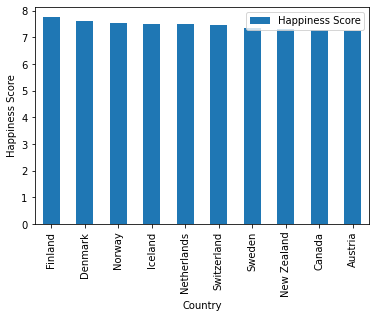

<Figure size 432x288 with 0 Axes>

In [46]:
# Top 20 and bottom 20 dfs for 2019
top_20_2019 = norm2019_df.set_index("Country or Region")
top_20_2019_happy = top_20_2019[["Happiness Score"]][:10]
bottom_20_2019 = top_20_2019[["Happiness Score"]][-10:]
# Create a bar chart 
count_chart = top_20_2019_happy.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happiness Score")
plt.show()
plt.tight_layout()

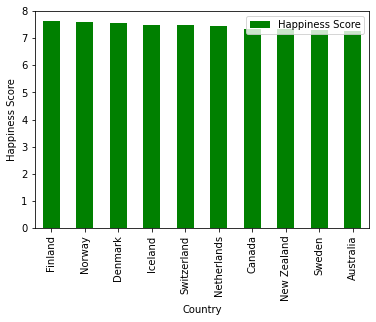

<Figure size 432x288 with 0 Axes>

In [39]:
# Top 20 and bottom 20 dfs for 2018
top_20_2018 = norm2018_df.set_index("Country or Region")
top_20_2018_happy = top_20_2018[["Happiness Score"]][:10]
bottom_20_2018 = top_20_2018[["Happiness Score"]][-10:]
# Create a bar chart 
count_chart = top_20_2018_happy.plot(kind='bar', color = 'green')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happiness Score")
plt.show()
plt.tight_layout()                                             

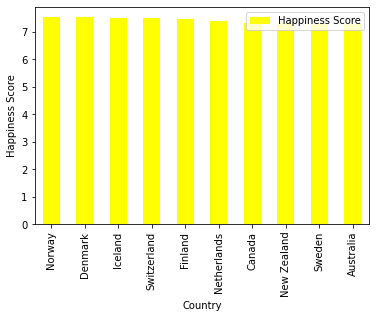

<Figure size 432x288 with 0 Axes>

In [40]:
# Top 20 and bottom 20 dfs for 2017
top_20_2017 = norm2017_df.set_index("Country or Region")
top_20_2017_happy = top_20_2017[["Happiness Score"]][:10]
bottom_20_2017 = top_20_2017[["Happiness Score"]][-10:]

# Create a bar chart 
count_chart = top_20_2017_happy.plot(kind='bar', color = 'yellow')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happiness Score")
plt.show()
plt.tight_layout()

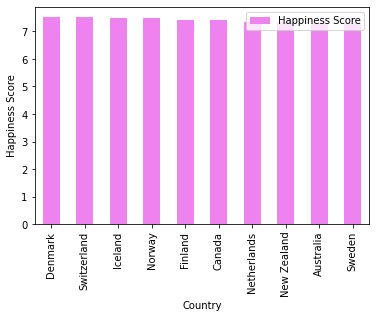

<Figure size 432x288 with 0 Axes>

In [41]:
# Top 20 and bottom 20 dfs for 2016
top_20_2016 = norm2016_df.set_index("Country or Region")
top_20_2016_happy = top_20_2016[["Happiness Score"]][:10]
bottom_20_2016 = top_20_2016[["Happiness Score"]][-10:]

# Create a bar chart 
count_chart = top_20_2016_happy.plot(kind='bar', color='violet')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happiness Score")
plt.show()
plt.tight_layout()

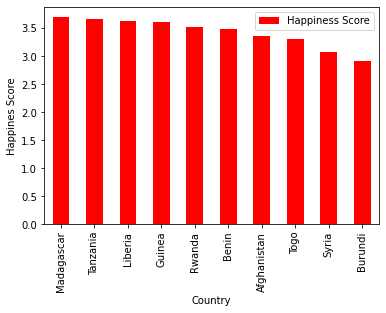

<Figure size 432x288 with 0 Axes>

In [42]:
# the saddest country 
# Create a bar chart 
count_chart = bottom_20_2016.plot(kind='bar', color = 'red')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happines Score")
plt.show()
plt.tight_layout()

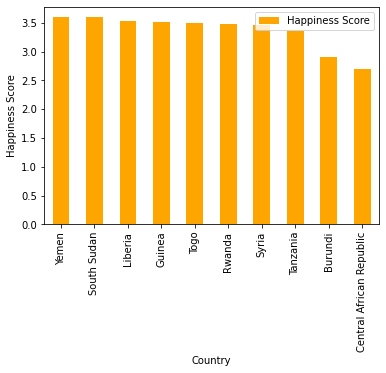

<Figure size 432x288 with 0 Axes>

In [43]:
# Create a bar chart 
count_chart = bottom_20_2017.plot(kind='bar', color= 'orange')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happiness Score")
plt.show()
plt.tight_layout()

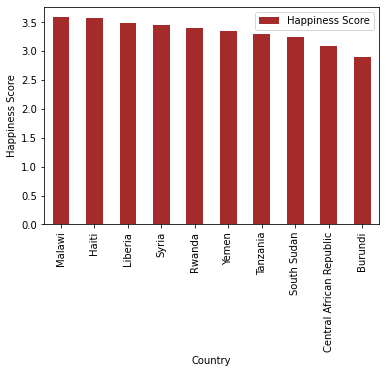

<Figure size 432x288 with 0 Axes>

In [44]:
# Create a bar chart 
count_chart = bottom_20_2018.plot(kind='bar', color = 'brown')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happiness Score")
plt.show()
plt.tight_layout()

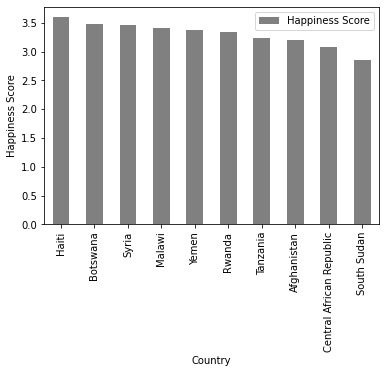

<Figure size 432x288 with 0 Axes>

In [47]:
# Create a bar chart 
count_chart = bottom_20_2019.plot(kind='bar', color = 'gray')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Happiness Score")
plt.show()
plt.tight_layout()